## Missing MS2-Spectra Experiments

Reproduce plots for the experiments with missing MS2, see Section 4.4 and Figure 4.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.append(".")
from local_utils import IDIR_CASMI, IDIR_EA

from msmsrt_scorer.experiments.EA_Massbank.plot_and_table_utils import load_results_missing_ms2

In [2]:
param_selection_measure = "topk_auc"
use_global_parameter_selection = True
k_values_to_consider = [1, 5, 10, 20]

**Load the results**

In [3]:
res = pd.DataFrame()

for eval_method in ["casmi"]:
    # EA Dataset, Positive
    ion_mode, max_n_ms2, n_samples = "positive", 100, 100

    _idir = IDIR_EA(
        tree_method="random", n_random_trees=32, ion_mode=ion_mode, D_value_method=None, mode="missing_ms2",
        base_dir="../EA_Massbank/results__TFG__platt", param_selection_measure=param_selection_measure, 
        make_order_prob="sigmoid", norm_scores="none", use_global_parameter_selection=use_global_parameter_selection,
        margin_type="max")

    _res_EA_pos = load_results_missing_ms2(
        _idir, max_n_ms2, n_samples=n_samples, method=eval_method, load_random=False,
        k_values_to_consider=k_values_to_consider)[0]
    _res_EA_pos["Dataset"] = "EA (Massbank)"
    _res_EA_pos["Ionization"] = "positive"
    _res_EA_pos["Evaluation"] = eval_method

    # EA Dataset, Positive
    ion_mode, max_n_ms2, n_samples = "negative", 65, 50

    _idir = IDIR_EA(
        tree_method="random", n_random_trees=32, ion_mode=ion_mode, D_value_method=None, mode="missing_ms2",
        base_dir="../EA_Massbank/results__TFG__platt", param_selection_measure=param_selection_measure, 
        make_order_prob="sigmoid", norm_scores="none", use_global_parameter_selection=use_global_parameter_selection,
        margin_type="max")

    _res_EA_neg = load_results_missing_ms2(
        _idir, max_n_ms2, n_samples=n_samples, method=eval_method, load_random=False,
        k_values_to_consider=k_values_to_consider)[0]
    _res_EA_neg["Dataset"] = "EA (Massbank)"
    _res_EA_neg["Ionization"] = "negative"
    _res_EA_neg["Evaluation"] = eval_method

    # EA Dataset, Positive
    ion_mode, max_n_ms2, n_samples = "positive", 75, 50

    _idir = IDIR_CASMI(
        tree_method="random", n_random_trees=32, ion_mode=ion_mode, D_value_method=None, mode="missing_ms2",
        base_dir="../CASMI_2016/results__TFG__platt", param_selection_measure=param_selection_measure, 
        make_order_prob="sigmoid", norm_order_scores=False, use_global_parameter_selection=use_global_parameter_selection,
        margin_type="max")

    _res_CAS_pos = load_results_missing_ms2(
        _idir, max_n_ms2, n_samples=n_samples, method=eval_method, load_random=False,
        k_values_to_consider=k_values_to_consider)[0]
    _res_CAS_pos["Dataset"] = "CASMI 2016"
    _res_CAS_pos["Ionization"] = "positive"
    _res_CAS_pos["Evaluation"] = eval_method

    # EA Dataset, Negative
    ion_mode, max_n_ms2, n_samples = "negative", 50, 50

    _idir = IDIR_CASMI(
        tree_method="random", n_random_trees=32, ion_mode=ion_mode, D_value_method=None, mode="missing_ms2",
        base_dir="../CASMI_2016/results__TFG__platt", param_selection_measure=param_selection_measure, 
        make_order_prob="sigmoid", norm_order_scores=False, use_global_parameter_selection=use_global_parameter_selection,
        margin_type="max")

    _res_CAS_neg = load_results_missing_ms2(
        _idir, max_n_ms2, n_samples=n_samples, method=eval_method, load_random=False,
        k_values_to_consider=k_values_to_consider)[0]
    _res_CAS_neg["Dataset"] = "CASMI 2016"
    _res_CAS_neg["Ionization"] = "negative"
    _res_CAS_neg["Evaluation"] = eval_method

    res = pd.concat((res, _res_EA_pos, _res_EA_neg, _res_CAS_pos, _res_CAS_neg))
res

,sample,Method,perc_ms2,Top-1,Top-5,Top-10,Top-20,Dataset,Ionization,Evaluation
0,0,MS + RT,0,5.0,19.0,28.0,35.0,EA (Massbank),positive,casmi
1,0,Only MS,0,3.0,12.0,16.0,22.0,EA (Massbank),positive,casmi
2,0,MS + RT,25,9.0,31.0,41.0,50.0,EA (Massbank),positive,casmi
3,0,Only MS,25,7.0,24.0,30.0,35.0,EA (Massbank),positive,casmi
4,0,MS + RT,50,12.0,41.0,49.0,57.0,EA (Massbank),positive,casmi
...,...,...,...,...,...,...,...,...,...,...
495,49,Only MS,50,6.0,24.0,32.0,40.0,CASMI 2016,negative,casmi
496,49,MS + RT,75,6.0,32.0,44.0,56.0,CASMI 2016,negative,casmi
497,49,Only MS,75,6.0,32.0,42.0,52.0,CASMI 2016,negative,casmi
498,49,MS + RT,100,10.0,46.0,56.0,70.0,CASMI 2016,negative,casmi


**Calculate Performance-improvement**

In [7]:
res_baseline = res[res.Method == "Only MS"] \
    .reset_index() \
    .drop(["index"], axis=1) \
    .iloc[:, [0, 1, 2, 7, 8, 9, 3, 4, 5, 6]]
res_msrt = res[res.Method == "MS + RT"] \
    .reset_index() \
    .drop(["index"], axis=1) \
    .iloc[:, [0, 1, 2, 7, 8, 9, 3, 4, 5, 6]]

assert all(res_baseline.Method == "Only MS")
assert all(res_msrt.Method == "MS + RT")
assert np.all(res_baseline.columns == np.array([
    "sample", "Method", "perc_ms2", "Dataset", "Ionization", "Evaluation", "Top-1", "Top-5", "Top-10", "Top-20"]))
assert all(res_baseline["sample"] == res_msrt["sample"])

res_imp = pd \
    .concat((res_msrt.loc[:, ["perc_ms2", "Dataset", "Ionization", "Evaluation"]], 
             res_msrt.iloc[:, 6:] - res_baseline.iloc[:, 6:]), axis=1) \
    .melt(id_vars=["perc_ms2", "Dataset", "Ionization", "Evaluation"], var_name="Top-k", value_name="Accuracy improvement (%-points)")

res_imp.head()

,perc_ms2,Dataset,Ionization,Evaluation,Top-k,Accuracy improvement (%-points)
0,0,EA (Massbank),positive,casmi,Top-1,2.0
1,25,EA (Massbank),positive,casmi,Top-1,2.0
2,50,EA (Massbank),positive,casmi,Top-1,3.0
3,75,EA (Massbank),positive,casmi,Top-1,4.0
4,100,EA (Massbank),positive,casmi,Top-1,5.0


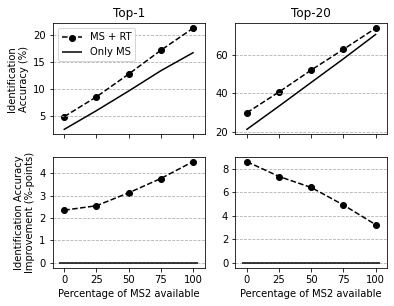

In [8]:
fig, axrr = plt.subplots(2, 2, squeeze=False, figsize=(6, 4.5), sharex="all")

_xlabels = [0, 25, 50, 75, 100]
_x = range(len(_xlabels))

for i, topk in enumerate(["Top-%d" % k for k in [1, 20]]):
    # Get the current axis
    ax = axrr[1, i] 
    
    # Plot basline, horizontal line at 0
    _h_bsl = ax.hlines(0, -0.15, 4.15, color="black", linestyle="-")
    
    # Plot average (RT + MS)
    #   (1) Calculate average for each (perc, dataset, ionization) 
    #   (2) Calculate overall-average for each 'perc'
    _eval_method = "casmi"
    
    _y = res_imp.loc[(res_imp["Top-k"] == topk) & (res_imp["Evaluation"] == _eval_method)] \
        .groupby(["perc_ms2", "Dataset", "Ionization"]).mean() \
        .groupby("perc_ms2").mean()  
    _h1_rtms, = ax.plot(_x, _y, linestyle="--", color="black")
    _h2_rtms = ax.scatter(_x, _y, color="black")
    
    ax.grid(axis="y", linestyle="--")
    
    if i == 0:
        ax.set_ylabel("Identification Accuracy\nImprovement (%-points)")
        
              
    ax.set_xlabel("Percentage of MS2 available")
    ax.set_xticks(_x)
    ax.set_xticklabels(_xlabels)
    
for i, topk in enumerate(["Top-%d" % k for k in [1, 20]]):
    # Get the current axis
    ax = axrr[0, i] 
    
    # Plot average (RT + MS)
    #   (1) Calculate average for each (perc, dataset, ionization) 
    #   (2) Calculate overall-average for each 'perc'
    _eval_method = "casmi"
    
    # Plot Baseline (Only RT)
    _y = res_baseline \
            .loc[res_baseline.Evaluation == _eval_method, ["Dataset", "Ionization", "perc_ms2", topk]] \
            .groupby(["Dataset", "Ionization", "perc_ms2"]).mean() \
            .groupby(["perc_ms2"]).mean()
    ax.plot(_x, _y, linestyle="-", color="black")
        
    # Plot average (RT + MS)
    _y = res_msrt \
            .loc[res_msrt.Evaluation == _eval_method, ["Dataset", "Ionization", "perc_ms2", topk]] \
            .groupby(["Dataset", "Ionization", "perc_ms2"]).mean() \
            .groupby(["perc_ms2"]).mean()
    ax.plot(_x, _y, linestyle="--", color="black")
    ax.scatter(_x, _y, color="black")
    
    ax.grid(axis="y", linestyle="--")
    
    if i == 0:
        ax.set_ylabel("Identification\nAccuracy (%)")

    
    ax.set_title("%s" % (topk))  
    
axrr[0, 0].legend([(_h1_rtms, _h2_rtms), _h_bsl], ("MS + RT", "Only MS"), loc="best")